In [1]:
import numpy as np
import scipy as sc
import scipy.misc as msc
import scipy.stats as st
from scipy.special import comb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import sqrtm
from matplotlib import cm
%matplotlib inline

## Условное математическое ожидание

Условная плотность:
$$
p(y|x_0) = \frac{p(x_0,y)}{p(x_0)}
$$

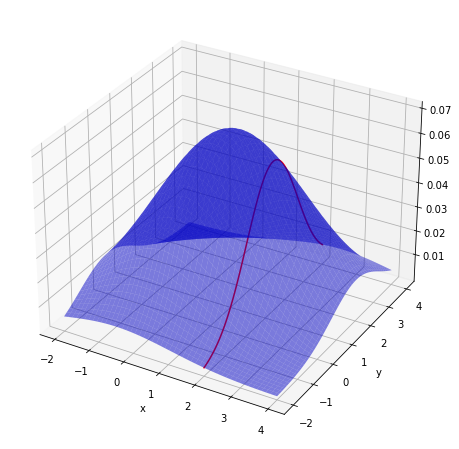

In [2]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
n_points = 100
x = np.linspace(-2, 4, n_points) 
y = np.linspace(-2, 4, n_points) 
X, Y = np.meshgrid(x,  y)
K = np.array([[3,1],[1,2]])
m = np.array([1,1])
k_det = np.linalg.det(K)
n = 2 
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        u = np.array([X[i,j],Y[i,j]])
        Z[i,j] = 1/(2*np.pi)**(n/2)/k_det**(1/2)*np.exp(-(u-m).dot(np.linalg.inv(K)).dot(u-m)/2)

ax.set_xlabel('x')
ax.set_ylabel('y')

x_section = 2 #p(y|x_section)
x = x_section*np.ones(n_points)
y = np.linspace(-2,4, n_points)
z = np.zeros(n_points)
z_cond = np.zeros(n_points)

for i in range(n_points):
    d = sqrtm(K)[0,0]**2 + sqrtm(K)[0,1]**2 
    fx = 1/np.sqrt(2*np.pi*d)*np.exp(-(x[i] - m[0])**2/(2*d))
    u = np.array([x[i], y[i]])
    fxy = 1/(2*np.pi)**(n/2)/k_det**(1/2)*np.exp(-(u - m).dot(np.linalg.inv(K)).dot(u - m)/2)
    z[i] = fxy#/fx
    z_cond[i] = fxy/fx
ax.plot(x, y, z,  color='r', label='$p(y|x_0)$')
surf = ax.plot_surface(X, Y, Z, label = 'PDF Gauss', color='b', alpha=0.5,  antialiased=True)
#ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10, label='PDF Gauss')
#ax.legend()

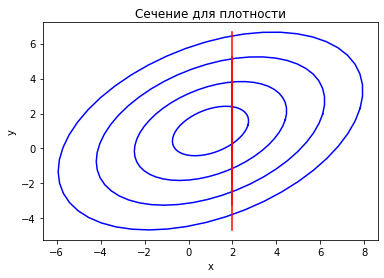

In [3]:
for r in [1,2,3,4]:
    phi = np.linspace(0,2*np.pi)
    x1 = r*np.cos(phi)
    y1 = r*np.sin(phi)
    v1 = np.vstack([x1,y1])
    u1 = sqrtm(K).dot(v1) + np.matrix(m).T
    plt.plot(np.array(u1[0,:])[0],np.array(u1[1,:])[0],'b');
    y_min = np.min(np.array(u1[1,:])[0])
    y_max = np.max(np.array(u1[1,:])[0])    
    plt.plot([x_section, x_section],[y_min, y_max],'r')
    plt.title('Сечение для плотности')
    plt.xlabel('x')
    plt.ylabel('y')

In [4]:
m

array([1, 1])

In [5]:
K

array([[3, 1],
       [1, 2]])

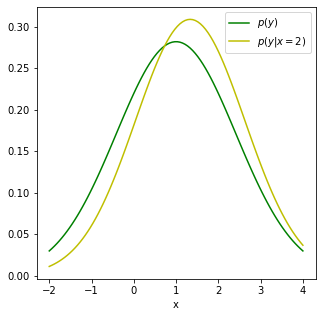

In [6]:
def f_n(x, m, d):
    return 1/np.sqrt(2*np.pi*d)*np.exp(-1/2*(x-m)**2/d)
fig = plt.figure(figsize=(5, 5))

d = sqrtm(K)[1,0]**2 + sqrtm(K)[1,1]**2 
ax = fig.add_subplot(111)
ax.plot(y, f_n(y,m[1], d), 'g',label='$p(y)$')
ax.plot(y, z_cond, 'y',label=f'$p(y|x={x_section})$')
ax.set_xlabel('x')
ax.legend();


## Оценка

Воспользуемся формулой для объеденения наблюдений:
$$
p(\theta|x_1) = \frac{p_1(x_1|\theta) p(\theta)}{ \int p(x_1|\theta) p(\theta)\,d\theta}
$$
$$
p(\theta|x_1,x_2) = \frac{p_2(x_2|\theta)p(\theta|x_1)}{\int p(x_2|\theta)p(\theta|x_1)\,d\theta}
$$
$\dots$
$$
p(\theta|x_1,x_2,\dots,x_n) = \frac{p_n(x_n|\theta)p(\theta|x_1,\dots,x_{n-1})}{\int p(x_n|\theta)p(\theta|x_1,\dots,x_{n-1})\,d\theta}
$$


In [7]:
und_value = 2
x = np.random.randn(70) + und_value

Text(0.5, 1.0, '$\\theta = 2$')

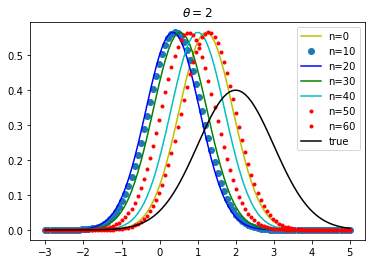

In [8]:
theta = np.linspace(-3,5,100)
h = theta[1]-theta[0]
p_prior = f_n(theta,0,1)
j = 0
c = ['y','o','b','g','c','r.','r.']
for i,el in enumerate(x):
    p = f_n(el,theta,1)*p_prior
    prior_r = p/np.sum(p)/h
    if i%10 == 0:
        plt.plot(theta,prior_r,c[j], label=f'n={str(i)}')
        j += 1
plt.plot(theta, f_n(theta,und_value,1),'k',label='true')
plt.legend()
plt.title(f'$\\theta = {und_value}$')    

### МНК (Картинка)

In [9]:
n  = 100
sigma = 1
x = np.zeros([n,2])
w =  np.array([0,1])
t = np.linspace(0,2,n)
x[:,0] = 1
x[:,1] = t
eps = sigma*np.random.randn(n)
y = x.dot(w.T) + eps

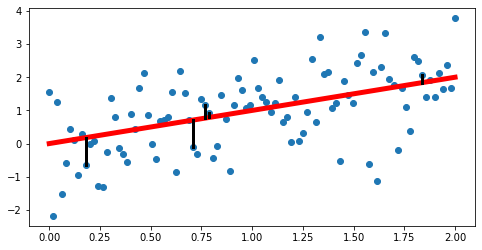

In [10]:
n_black_lines = 5
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.plot(t,y,'o',label='y')
ax.plot(t,x.dot(w.T),'r', linewidth=5)
for i in np.random.randint(0,n, n_black_lines):
    ax.plot([t[i],t[i]],[x.dot(w.T)[i], y[i]],'k',linewidth=3)
fig.savefig('mnk.png')